In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import plotly.graph_objs as go
from matplotlib.text import Text


In [2]:
origen = "2807905"
destino = "2807901"
Trayecto = origen + "-" + destino

In [3]:
df_clean = pd.read_csv("/home/jonathan/tesis/11avo_avance/SerieTempFeb_Jul.csv", sep=',',index_col=0, parse_dates=True)    
df_clean['Año'] = df_clean.index.year                                
df_clean['Mes'] = df_clean.index.month                               
df_clean['Dia'] = df_clean.index.day_name()
df_clean['ID_Dia'] = df_clean.index.dayofweek
df_clean['Hora'] = df_clean.index.hour
df_clean['#_Week'] = df_clean.index.isocalendar().week
df_clean.head()

,2807905-2807901,Año,Mes,Dia,ID_Dia,Hora,#_Week
ds,,,,,,,
2020-02-14 00:00:00,308.104,2020,2,Friday,4,0,7
2020-02-14 01:00:00,165.496,2020,2,Friday,4,1,7
2020-02-14 02:00:00,155.760,2020,2,Friday,4,2,7
2020-02-14 03:00:00,126.662,2020,2,Friday,4,3,7
2020-02-14 04:00:00,123.672,2020,2,Friday,4,4,7


In [4]:
data1 = df_clean.loc['2020-02-14':'2020-03-15']

In [5]:
TablaTrayecto = pd.pivot_table(data1, values=Trayecto, index=['ID_Dia','Dia','Hora'],
                                columns=['#_Week'],fill_value=0)
origen = Trayecto[0:7]
destino = Trayecto[8:15]
lines_names = {"2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
TablaTrayecto = TablaTrayecto.rename(columns={TablaTrayecto.columns[0]:'1',TablaTrayecto.columns[1]:'2',TablaTrayecto.columns[2]:'3',TablaTrayecto.columns[3]:'4',TablaTrayecto.columns[4]:'5'})

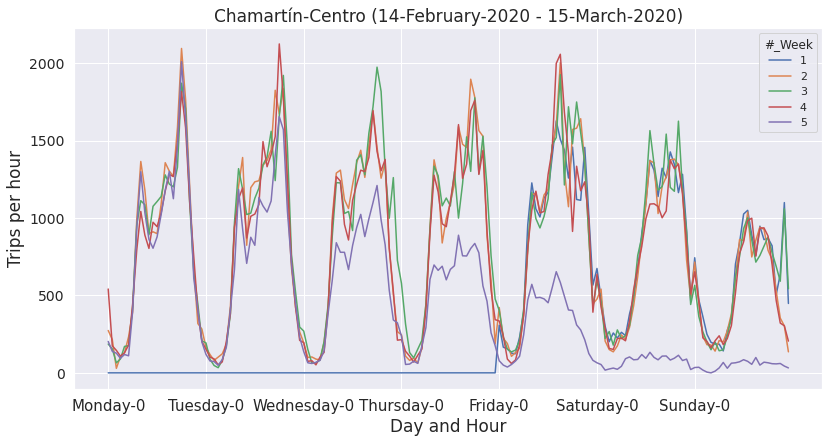

In [6]:
sb.set(rc = {'figure.figsize':(8,3)})
ax=0

fig, axes = plt.subplots(nrows=1, ncols=1)
ax_list = fig.axes
plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
TablaTrayecto.plot(ax=ax_list[ax]); ax_list[ax].set_title(lines_names[origen]+"-"+lines_names[destino]+" "+'(14-February-2020 - 15-March-2020)', fontsize=17)
ax_list[ax].set_xlabel("Day and Hour", fontsize=17)
ax_list[ax].set_ylabel("Trips per hour", fontsize=17)

#########################################################
# Obtener los ejes de la gráfica
ax = ax_list[ax]

# Modificar la posición de los xticks
new_xticks = [0, 24, 48, 72, 96, 120, 144]  # Nuevas posiciones de los xticks
ax.set_xticks(new_xticks)

# Asignar etiquetas a los xticks
xtick_labels = ['Monday-0', 'Tuesday-0', 'Wednesday-0', 'Thursday-0', 'Friday-0', 'Saturday-0', 'Sunday-0']
ax.set_xticklabels(xtick_labels,fontsize=15)

ax.tick_params(axis='y', labelsize=14)

plt.show()